# Image Manipulation with skimage

This example builds a simple UI for performing basic image manipulation with [scikit-image](http://scikit-image.org/).

In [1]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import skimage
from skimage import data, filter, io

/Users/fperez/usr/conda/envs/ipython-3.1/lib/python3.4/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [3]:
i = data.coffee()

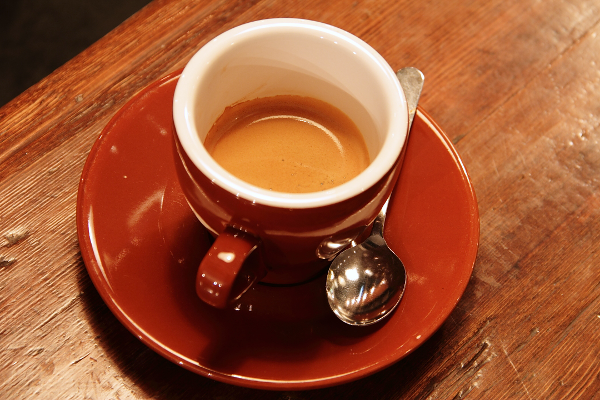

In [4]:
io.Image(i)

In [5]:
def edit_image(image, sigma=0.1, r=1.0, g=1.0, b=1.0):
    new_image = filter.gaussian_filter(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    new_image = io.Image(new_image)
    display(new_image)
    return new_image

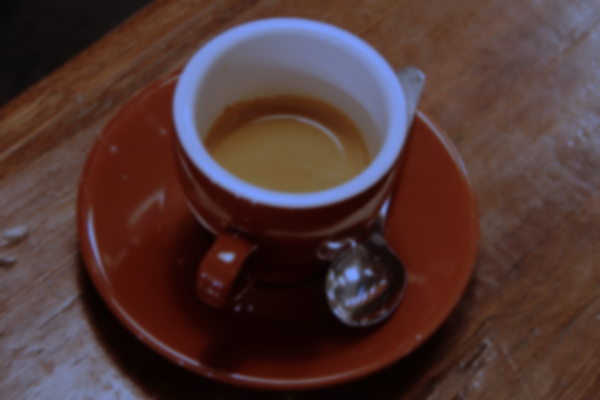

In [6]:
lims = (0.0,1.0,0.01)
w = interactive(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), r=lims, g=lims, b=lims)
display(w)

/Users/fperez/usr/conda/envs/ipython-3.1/lib/python3.4/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


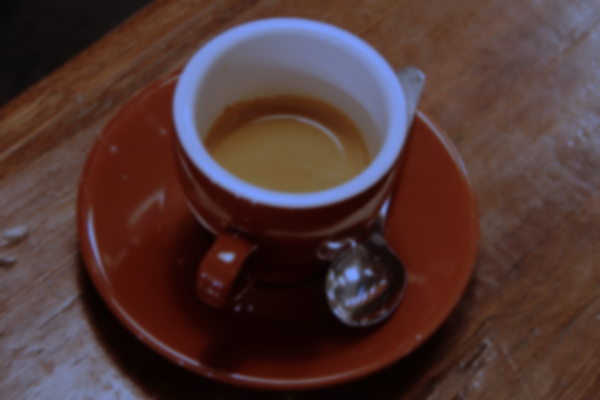

In [7]:
w.result

## Python 3 only: Function annotations

In Python 3, you can use the new function annotation syntax to describe widgets for interact, and identifiers can also use Unicode, such as σ instead of `sigma`:

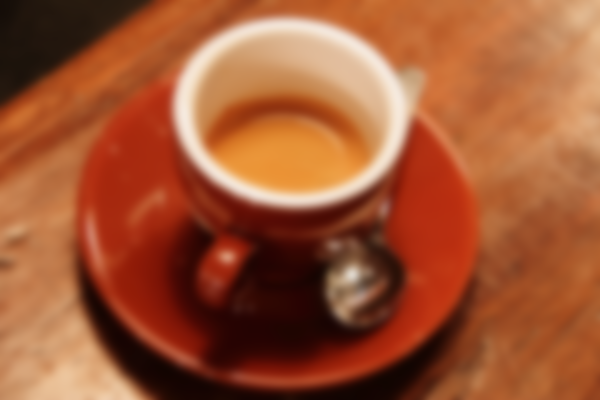

In [10]:
lims = (0.0,1.0,0.01)

@interact
def edit_image(image: fixed(i),  σ:(0.0,10.0,0.1)=0.3,
               r:lims=1.0, g:lims=1.0, b:lims=1.0):
    
    new_image = filter.gaussian_filter(image, sigma=σ, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    new_image = io.Image(new_image)
    display(new_image)
    return new_image